## Partie 1


### 1.1. Caractéristiques de l'image


1. **Calcul de l'histogramme**

In [237]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [238]:
def compute_histogram(image):
    # Compute histogram manually
    histogram = np.zeros(256, dtype=int)  # Initialize array for 256 intensity values

    # Count pixel occurrences
    for pixel_value in image.flatten():  # Flatten the image to a 1D array
        histogram[pixel_value] += 1
    return histogram

In [239]:
image_path="./key_16_17.tif"

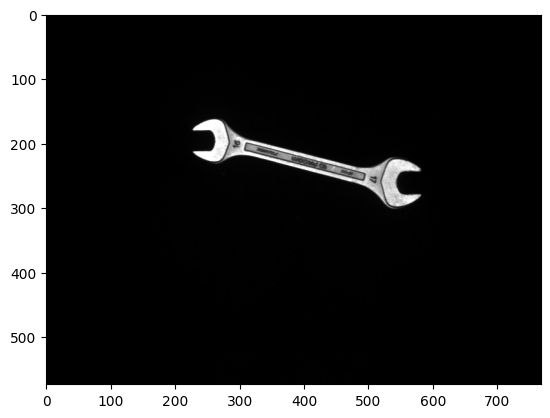

In [240]:

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()


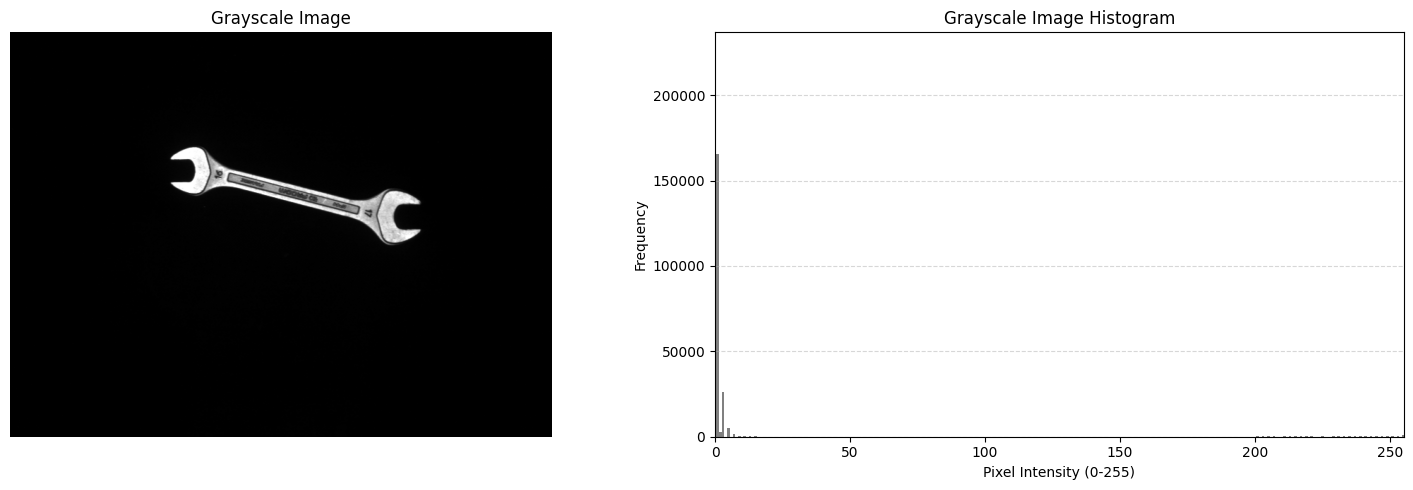

In [241]:
def plot_histogram(image, histogram):
    # Create a figure with two subplots: one for the image, one for the histogram
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the image on the left
    ax[0].imshow(image, cmap='gray')
    ax[0].axis('off')  # Turn off the axis for the image
    ax[0].set_title("Grayscale Image")

    # Plot the histogram on the right
    ax[1].bar(range(256), histogram, color='gray', width=1.0)
    ax[1].set_xlabel("Pixel Intensity (0-255)")
    ax[1].set_ylabel("Frequency")
    ax[1].set_title("Grayscale Image Histogram")
    ax[1].set_xlim([0, 255])
    ax[1].grid(axis="y", linestyle="--", alpha=0.5)

    # Show the plots
    plt.tight_layout()
    plt.show()


histogram = compute_histogram(image)
plot_histogram(image, histogram)

### Description de l'allure de l'histogramme obtenu

Un pic très élevé près de l'intensité 0, représentant la majorité des pixels (le fond noir dominant de l'image). Juste après ce pic, on observe quelques petites variations ou un léger étalement de fréquences (autour des intensités très basses, proches de 0), qui pourraient correspondre aux détails fins comme l'écriture ou les petites imperfections sur la clé à molette.
Un ensemble de petites variations ou une distribution étalée autour de l'intensité 200-250, correspondant aux pixels plus clairs de la clé à molette, reflétant les nuances et reflets de l'objet.
Entre ces deux extrêmes, il y a très peu de pixels avec des intensités intermédiaires, ce qui traduit le contraste élevé de l'image (fond noir profond et objet clair).

### Identification des différentes composantes de l'image dans l'histogramme
D'accord, voici une version plus concise sans trop de détails :

---

**Le fond noir (pic près de l'intensité 0)** :  
Le pic autour de l'intensité 0 correspond au fond noir dominant de l'image.

**Les détails fins ou l'écriture sur la clé (légères variations juste après le pic à 0)** :  
Juste après ce pic [0-40], on voit de petites variations correspondant à des détails subtils sur la clé à molette, comme de l'écriture ou des imperfections légères.

**La clé à molette elle-même (distribution étalée autour de 200-250)** :  
La plage 200-250 représente les pixels plus clairs de la clé à molette, avec des nuances de gris liées à sa texture et ses reflets.

**Les intensités intermédiaires (peu représentées)** :  
Il y a peu de pixels entre 0-30 et 200-250, ce qui montre un contraste élevé entre le fond noir et l'objet clair.

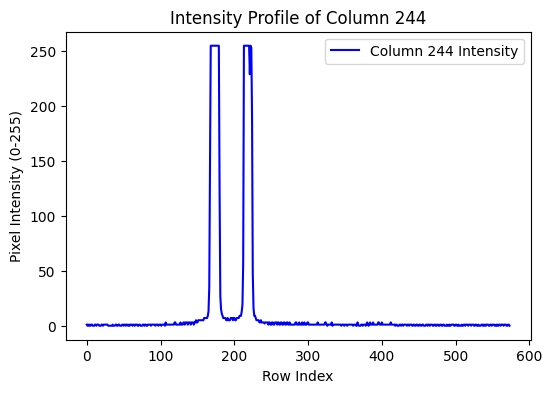

In [242]:
column_244 = image[:, 244]  # All rows at column index 244

# Plot the intensity profile of column 244
plt.figure(figsize=(6, 4))
plt.plot(column_244, label="Column 244 Intensity", color="blue")
plt.xlabel("Row Index")
plt.ylabel("Pixel Intensity (0-255)")
plt.title("Intensity Profile of Column 244")
plt.legend()
plt.show()

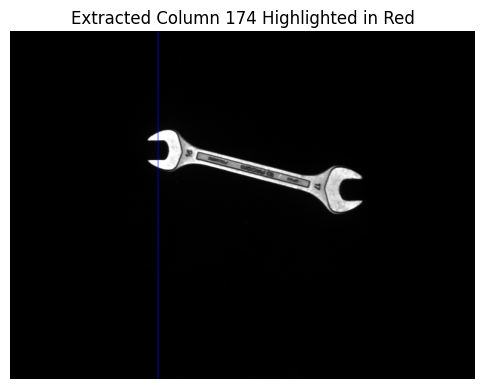

In [243]:


# Load the grayscale image (replace with your actual image variable if already loaded)
# image = cv2.imread('your_image_path.png', cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to BGR (to allow color overlays)
highlighted_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Define the column index to highlight
column_index = 244

# Set all pixels in column 174 to red
highlighted_image[:, column_index] = [0, 0, 255]  # BGR format (Red)

# Display the modified image
plt.figure(figsize=(6, 6))
plt.imshow(highlighted_image)
plt.title("Extracted Column 174 Highlighted in Red")
plt.axis("off")
plt.show()




Nous avons fni par prendre la colonne 174.
Le profil d'intensité de cette colonne montre des pics très nets correspondant aux transitions entre le fond noir et l'objet métallique. Ces transitions abruptes indiquent un fort contraste, c'est une séparation nette entre les zones sombres et les zones claires.

En relation avec l'histogramme, ce contraste élevé est confirmé par la répartition des pixels sur des niveaux extrêmes (proche de 0 et de 255) avec très peu de valeurs intermédiaires. Cela signifie que l'image est bien contrastée, mettant en évidence l'objet métallique par rapport à son fond sombre.

### 2. Comparaison des histogrammes : <br/>
#### Key_16_17_D.tif

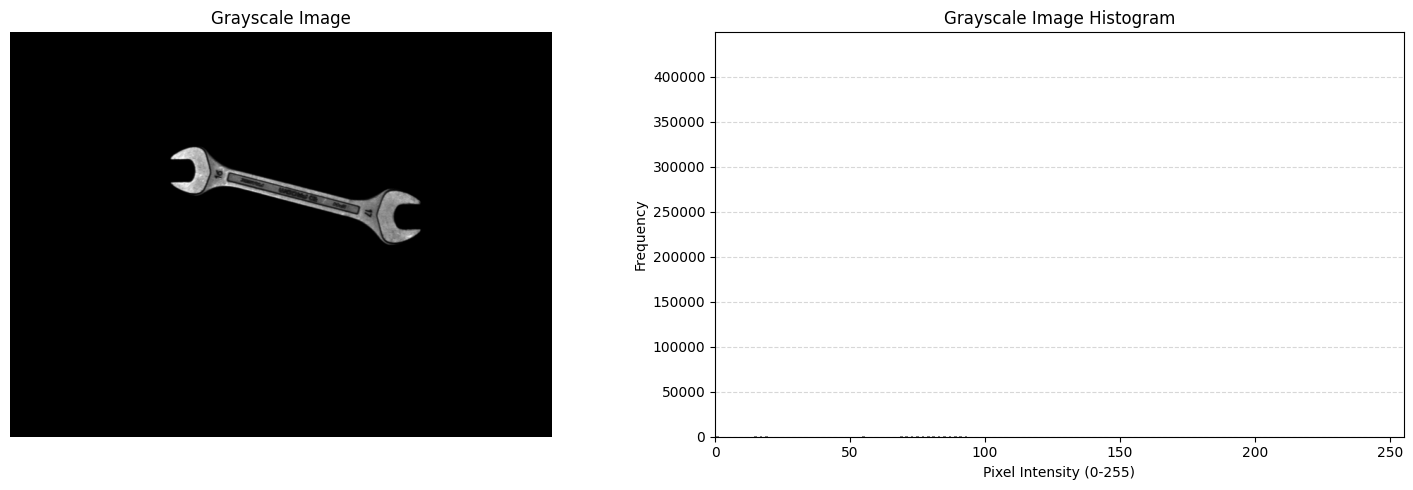

In [244]:
key_d="./Key_16_17_D.tif"
key_d_img = cv2.imread(key_d, cv2.IMREAD_GRAYSCALE)


key_d_hist = compute_histogram(key_d_img)
plot_histogram(key_d_img, key_d_hist)




In [245]:
key_d_hist

array([427772,    305,     40,    220,      0,    173,      0,    156,
            0,    109,      0,    157,      0,    219,      0,    251,
           45,    264,      1,    247,      0,    227,      0,    224,
            0,    198,      0,    147,      0,    163,     10,     93,
           57,    143,      0,    152,      0,    157,      0,    161,
            0,    144,      0,    141,      0,    184,      0,    178,
           31,    203,      1,    224,      0,    239,      0,    267,
            0,    201,      0,    187,      0,    211,     15,    106,
           91,    209,      0,    222,      0,    305,      0,    362,
            0,    399,      0,    367,      0,    470,      0,    355,
           48,    331,      0,    350,      0,    371,      0,    382,
            0,    333,      0,    275,      0,    284,     13,    135,
           85,    206,      0,    155,      0,    145,      0,    121,
            0,    108,      0,    113,      0,     97,      0,     92,
      

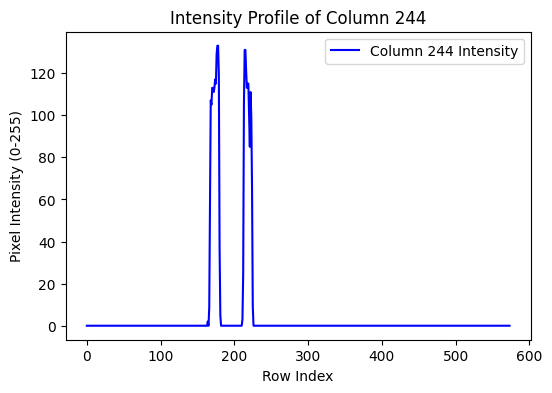

In [246]:
column_244 = key_d_img[:, 244]  # All rows at column index 244

# Plot the intensity profile of column 244
plt.figure(figsize=(6, 4))
plt.plot(column_244, label="Column 244 Intensity", color="blue")
plt.xlabel("Row Index")
plt.ylabel("Pixel Intensity (0-255)")
plt.title("Intensity Profile of Column 244")
plt.legend()
plt.show()

#### Key_16_17_L.tif

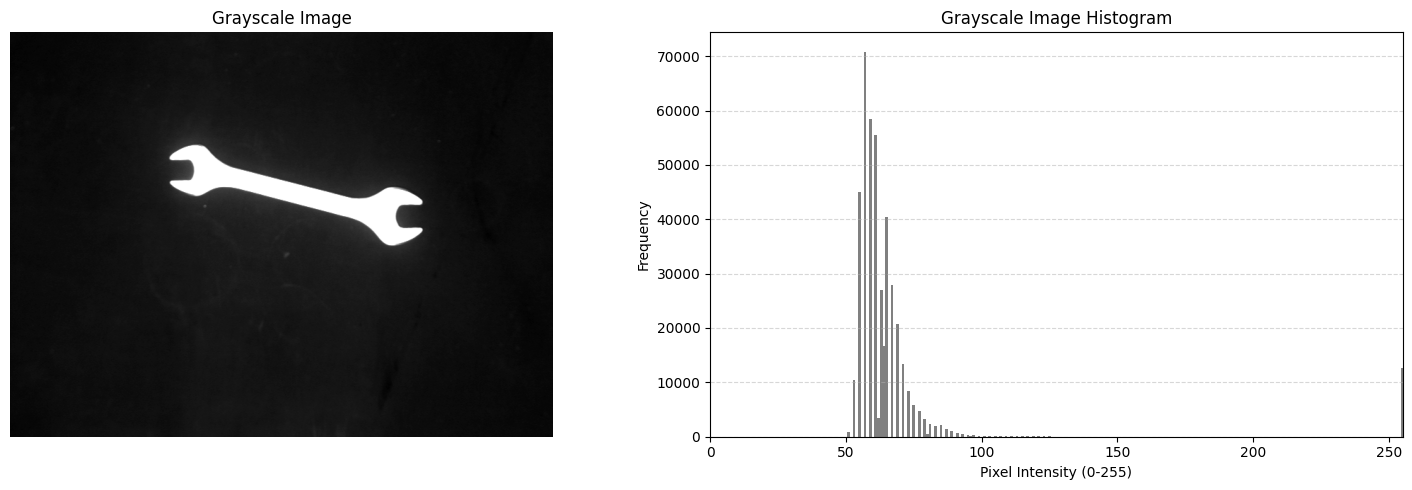

In [247]:
key_l="./Key_16_17_L.tif"
key_l_img = cv2.imread(key_l, cv2.IMREAD_GRAYSCALE)

histogram = compute_histogram(key_l_img)
plot_histogram(key_l_img, histogram)


fond et une partie d'ecriture:
entre 0 et 25
objet entre 200 et 250



key_16_17d:
fond : deplacement du fond à gauche  totalement vers 0
ecriture: semble rester dans le meme endroit  
deplacement de l'objet vers la gauche vers 65-90


key_16_17_l:
fond : deplacement du fond vers la droite  vers 50-70
objet: deplacement de l'objet  à droite totalement vers 250, aussi deplacement de l'ecriture vers 250 (elle n'apparait plus sur l'image).


In [248]:
histogram

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     1,    40,     1,   885,     0, 10496,
           0, 44989,     1, 70836,     0, 58518,     0, 55565,  3358,
       27016, 16681, 40412,    18, 27881,     0, 20699,     0, 13427,
           0,  8370,     0,  5875,     0,  4769,     0,  3275,   441,
        2320,     2,  2017,     0,  2083,     0,  1508,     0,   980,
           0,   672,     0,   543,    26,   225,   119,   255,     0,
         207,     0,   195,     0,   122,     0,   110,     0,    75,
           0,    73,     0,    65,     5,    51,     0,    55,     0,
          42,     0,    53,     0,    53,     0,    42,     0,    43,
           1,    22,

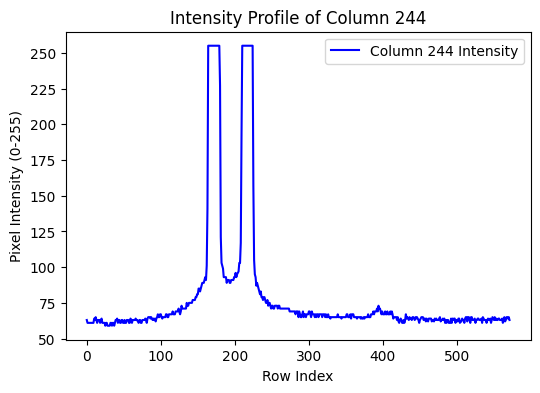

In [249]:
column_244 = key_l_img[:, 244]  # All rows at column index 244

# Plot the intensity profile of column 244
plt.figure(figsize=(6, 4))
plt.plot(column_244, label="Column 244 Intensity", color="blue")
plt.xlabel("Row Index")
plt.ylabel("Pixel Intensity (0-255)")
plt.title("Intensity Profile of Column 244")
plt.legend()
plt.show()

### Remarques sur les Déplacements de l’Histogramme :
- **Key_16_17d (plus sombre)** : L’histogramme se déplace vers la gauche. Le fond, initialement entre 0 et 25, se décale totalement vers 0 (noir absolu). L’objet, qui était entre 200 et 250, se déplace vers 65–90, devenant plus sombre. L’écriture reste à peu près à la même intensité, conservant sa visibilité.
- **Key_16_17l (plus clair)** : L’histogramme montre deux zones. Le fond se déplace vers la droite, de 0–25 à 50–70, avec un pic vers 60 et des intensités intermédiaires (80–140) pour la zone entre les extrémités de la clé (on a confirmé cela avec le profil de la ligne, entre les 2 pics l’intensité est de 90 au lieu de 0). L’objet et l’écriture se décalent à 250, devenant totalement blancs, ce qui fait disparaître l’écriture par manque de contraste.

### Changements dans les Conditions d’Acquisition :
- **Key_16_17d** : Réduction de la lumière ou exposition plus courte, rendant l’image plus sombre (fond vers 0, objet vers 65–90).
- **Key_16_17l** : Augmentation de la lumière ou exposition plus longue, rendant l’image plus claire (fond vers 50–70, objet et écriture à 250).

### 3. Traitment de seuillage

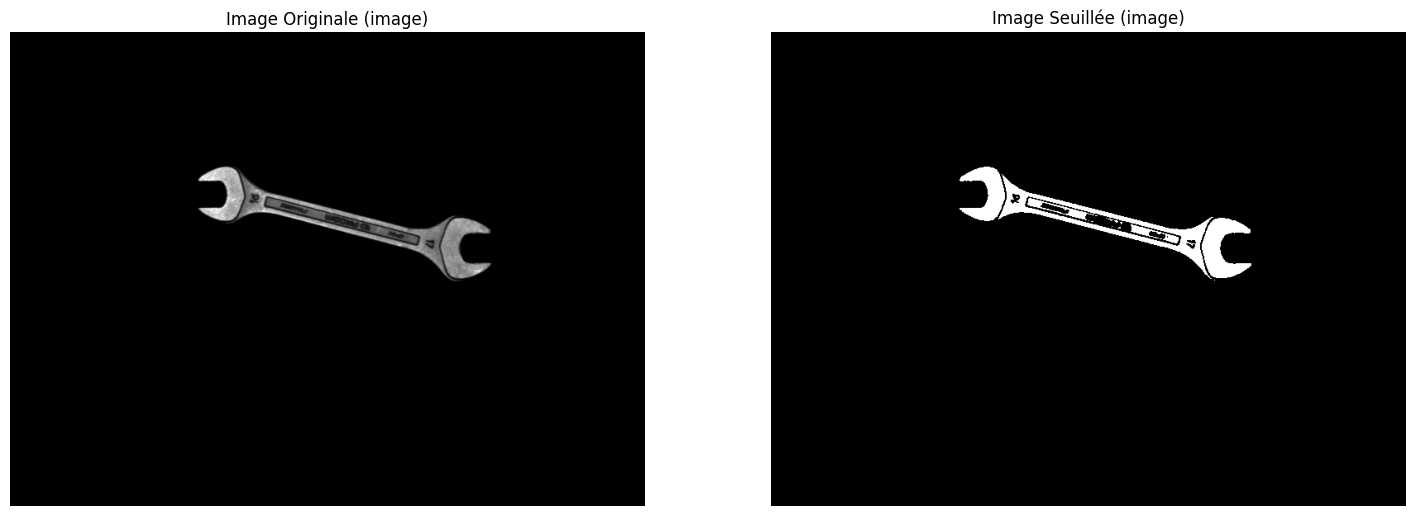

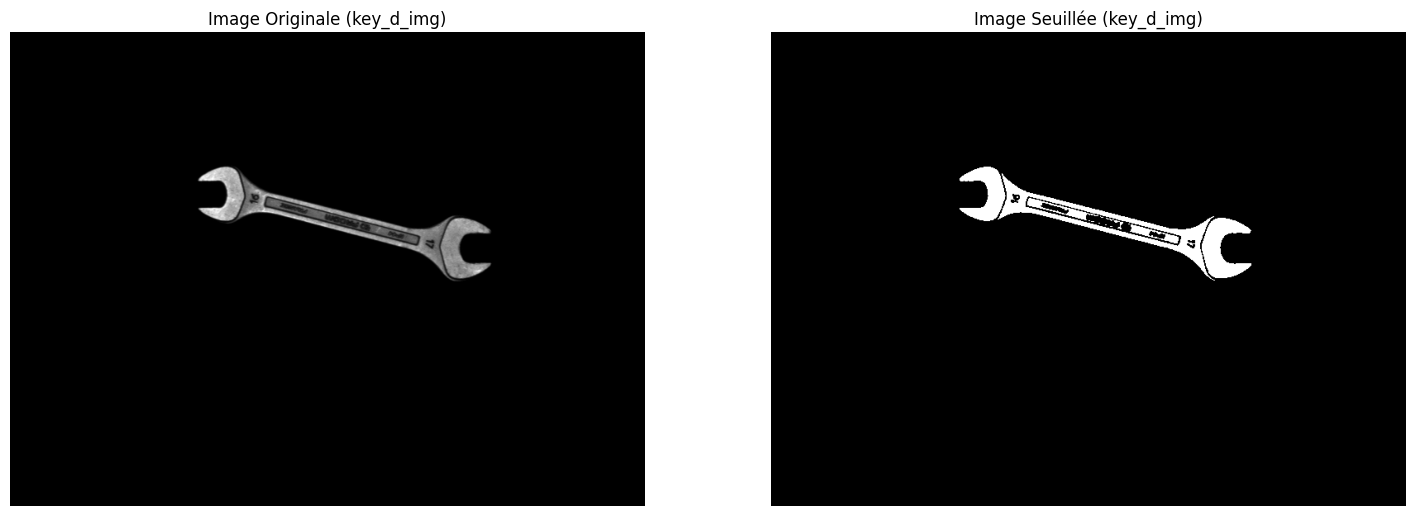

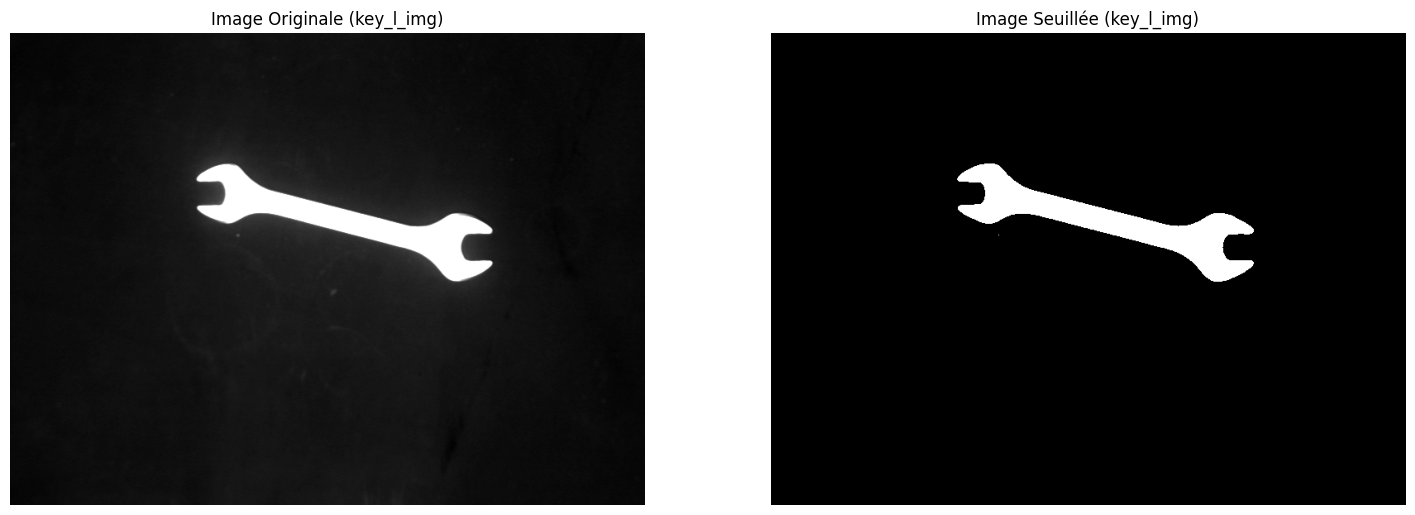

In [269]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def seuillage_manuel(img, seuil):
    """
    Effectue un seuillage manuel sur l'image.

    Parameters:
        img (ndarray): Image d'entrée (en niveaux de gris).
        seuil (int): Valeur de seuil pour séparer les pixels sombres et lumineux.

    Returns:
        ndarray: Image après le seuillage.
    """
    if len(img.shape) != 2:
        raise ValueError("L'image doit être en niveaux de gris (2D).")

    img_seuillée = np.where(img > seuil, 255, 0).astype(np.uint8)

    return img_seuillée


# Choisir le seuil
seuil = 40
seuil_img_d=35
seuil_img_l=120
# Seuillage sur l'image 'image' (une image de test que vous devez charger)
img_seuillée = seuillage_manuel(image, seuil)

# Afficher l'image originale et seuillée de 'image'
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Image Originale (image)")
axes[0].axis('off')

axes[1].imshow(img_seuillée, cmap='gray')
axes[1].set_title("Image Seuillée (image)")
axes[1].axis('off')

plt.show()

# Seuillage sur l'image 'key_d_img'
img_seuillée = seuillage_manuel(key_d_img, seuil_img_d)

# Afficher l'image originale et seuillée de 'key_d_img'
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].imshow(key_d_img, cmap='gray')
axes[0].set_title("Image Originale (key_d_img)")
axes[0].axis('off')

axes[1].imshow(img_seuillée, cmap='gray')
axes[1].set_title("Image Seuillée (key_d_img)")
axes[1].axis('off')

plt.show()

# Seuillage sur l'image 'key_l_img'
img_seuillée = seuillage_manuel(key_l_img, seuil_img_l)

# Afficher l'image originale et seuillée de 'key_l_img'
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].imshow(key_l_img, cmap='gray')
axes[0].set_title("Image Originale (key_l_img)")
axes[0].axis('off')

axes[1].imshow(img_seuillée, cmap='gray')
axes[1].set_title("Image Seuillée (key_l_img)")
axes[1].axis('off')

plt.show()


##Méthode utilisée :
Ici, nous avons décidé d'appliquer un seuillage binaire pour trois raisons :

L'objet et le fond sont visuellement séparables.
En analysant visuellement l'histogramme, nous pouvons choisir manuellement la bonne valeur pour séparer l'objet du fond.
Il y a ensuite des questions sur le seuillage automatique.
Nous avons choisi une valeur de seuil située entre les deux intervalles d'intensité correspondant au fond, à l'écriture (sauf pour key_l, où il n'y a pas d'écriture) et à l'objet. Ce seuil a été confirmé et ajusté en visualisant l'histogramme de chaque image.

Après avoir observé les résultats, les seuils choisis pour chaque image sont les suivants :

Pour l'image originale, le seuil est d'environ 40.
Pour l'image key_d, le seuil est d'environ 35.
Pour l'image key_l, le seuil est d'environ 140.

**Comparaison de seuillage**

##Peut-on, à partir de l'histogramme, définir les paramètres de seuillage précédents ?

Oui, comme l'objet et le fond sont bien séparés, nous avons pu choisir un seuil adapté. Cependant, certains détails fins, tels que l'écriture ou l'ombre à l'extrémité de l'histogramme, sont plus difficiles à détecter correctement, car ils ne sont pas totalement séparés du fond ou de l'objet. Dans ce cas, on peut soit ajuster manuellement la valeur du seuil en fonction de l'intervalle où ils se situent, soit utiliser, par exemple, le profil d'intensité d'une ligne représentative.

###Methode de seuillage automatique###

Seuillage de otsu

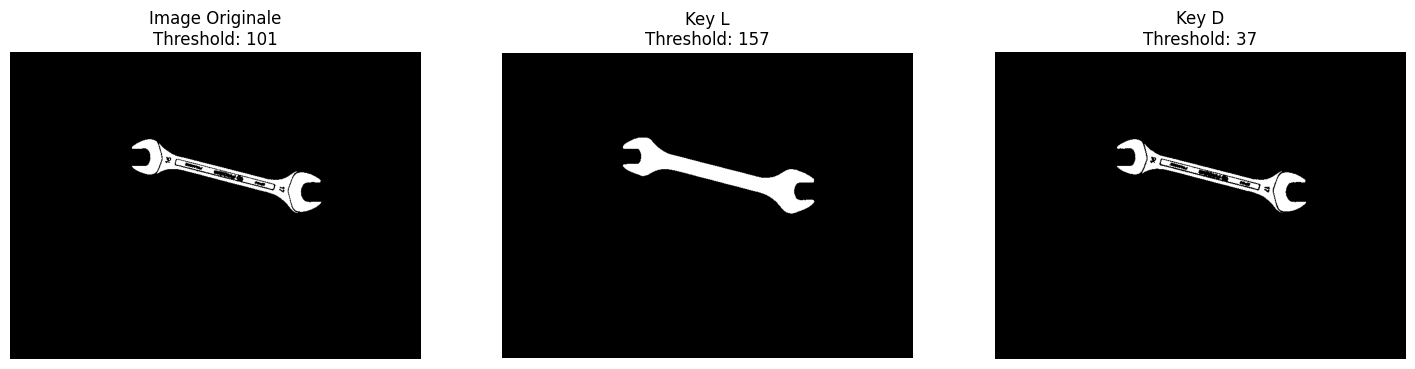

Threshold for Image: 101
Threshold for Key L Image: 157
Threshold for Key D Image: 37


In [251]:
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram(image):
    """
    Compute the histogram of the image. Assumes image is in grayscale.
    """
    hist, _ = np.histogram(image.flatten(), bins=256, range=(0, 256))
    return hist

def otsu_threshold(image):
    # Calcul de l'histogramme de l'image
    hist = compute_histogram(image)

    # Normalisation de l'histogramme pour obtenir les probabilités de chaque pixel
    total_pixels = image.size
    probas = hist / total_pixels  # probabilité d'apparition pour chaque pixel

    # Calcul de la moyenne globale de l'image
    global_mean = np.mean(image)

    # Initialisation des variables pour le calcul du seuil optimal
    best_threshold = 0
    max_between_class_variance = 0

    # Variables pour stocker les informations sur les classes
    w0 = 0  # Poids de la première classe (pixels <= T)
    w1 = 0  # Poids de la deuxième classe (pixels > T)
    mean0 = 0  # Moyenne de la première classe
    mean1 = 0  # Moyenne de la deuxième classe

    for t in range(256):
        w0 += probas[t]  # Update weight of class 1
        if w0 == 0 or w0 == 1:  # Avoid division by zero
            continue
        w1 = 1 - w0  # Weight of class 2

        mean0 += t * probas[t]  # Update mean of class 1
        mean1 = (global_mean - mean0) / w1  # Compute mean of class 2

        # Compute between-class variance
        between_class_variance = w0 * w1 * (mean0 / w0 - mean1) ** 2

        # Check if the variance is maximized
        if between_class_variance > max_between_class_variance:
            max_between_class_variance = between_class_variance
            best_threshold = t

    # Apply threshold to create binary image
    binary_image = np.where(image > best_threshold, 255, 0).astype(np.uint8)

    return best_threshold, binary_image

# Apply Otsu's thresholding to the three images
best_threshold, image_otsu = otsu_threshold(image)
best_threshold_l, key_l_img_otsu = otsu_threshold(key_l_img)
best_threshold_d, key_d_img_otsu = otsu_threshold(key_d_img)

# Display the results side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Display original image and its thresholded version
axes[0].imshow(image_otsu, cmap="gray")
axes[0].set_title(f"Image Originale\nThreshold: {best_threshold}")
axes[0].axis('off')

# Display key_l image and its thresholded version
axes[1].imshow(key_l_img_otsu, cmap="gray")
axes[1].set_title(f"Key L\nThreshold: {best_threshold_l}")
axes[1].axis('off')

# Display key_d image and its thresholded version
axes[2].imshow(key_d_img_otsu, cmap="gray")
axes[2].set_title(f"Key D\nThreshold: {best_threshold_d}")
axes[2].axis('off')

plt.show()

# Print the thresholds
print(f"Threshold for Image: {best_threshold}")
print(f"Threshold for Key L Image: {best_threshold_l}")
print(f"Threshold for Key D Image: {best_threshold_d}")


**Seuillage itterative**





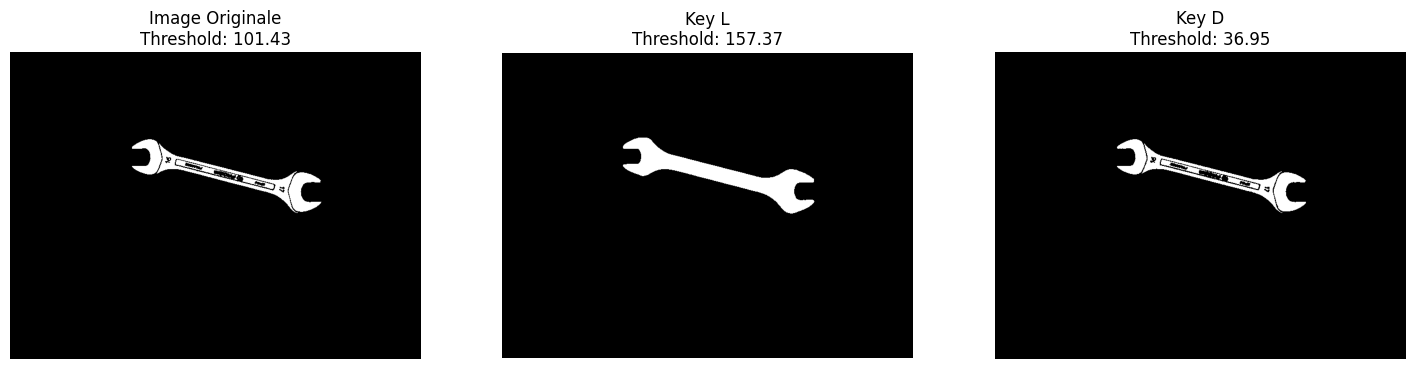

Threshold for Image: 101.43
Threshold for Key L Image: 157.37
Threshold for Key D Image: 36.95


In [252]:
import numpy as np
import matplotlib.pyplot as plt

def iterative_threshold(image):
    # Initialiser le seuil comme la moyenne globale
    initial_threshold = np.mean(image)

    while True:
        # Séparer l'image en deux classes
        below = image[image <= initial_threshold]
        above = image[image > initial_threshold]

        # Calculer les moyennes des deux classes
        if len(below) == 0 or len(above) == 0:
            break
        mean_below = np.mean(below)
        mean_above = np.mean(above)

        # Nouveau seuil comme la moyenne des moyennes
        new_threshold = (mean_below + mean_above) / 2

        # Vérifier la convergence
        if abs(new_threshold - initial_threshold) < 1:  # Tolérance de 1
            break
        initial_threshold = new_threshold

    # Appliquer le seuil pour créer l'image binaire
    binary_image = np.where(image > initial_threshold, 255, 0).astype(np.uint8)
    return initial_threshold, binary_image

# Appliquer la méthode iterative aux trois images
threshold, image_iter = iterative_threshold(image)
threshold_l, key_l_img_iter = iterative_threshold(key_l_img)
threshold_d, key_d_img_iter = iterative_threshold(key_d_img)

# Afficher les résultats côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

axes[0].imshow(image_iter, cmap="gray")
axes[0].set_title(f"Image Originale\nThreshold: {threshold:.2f}")
axes[0].axis('off')

axes[1].imshow(key_l_img_iter, cmap="gray")
axes[1].set_title(f"Key L\nThreshold: {threshold_l:.2f}")
axes[1].axis('off')

axes[2].imshow(key_d_img_iter, cmap="gray")
axes[2].set_title(f"Key D\nThreshold: {threshold_d:.2f}")
axes[2].axis('off')

plt.show()

# Afficher les seuils
print(f"Threshold for Image: {threshold:.2f}")
print(f"Threshold for Key L Image: {threshold_l:.2f}")
print(f"Threshold for Key D Image: {threshold_d:.2f}")

**Méthode du seuil minimum**

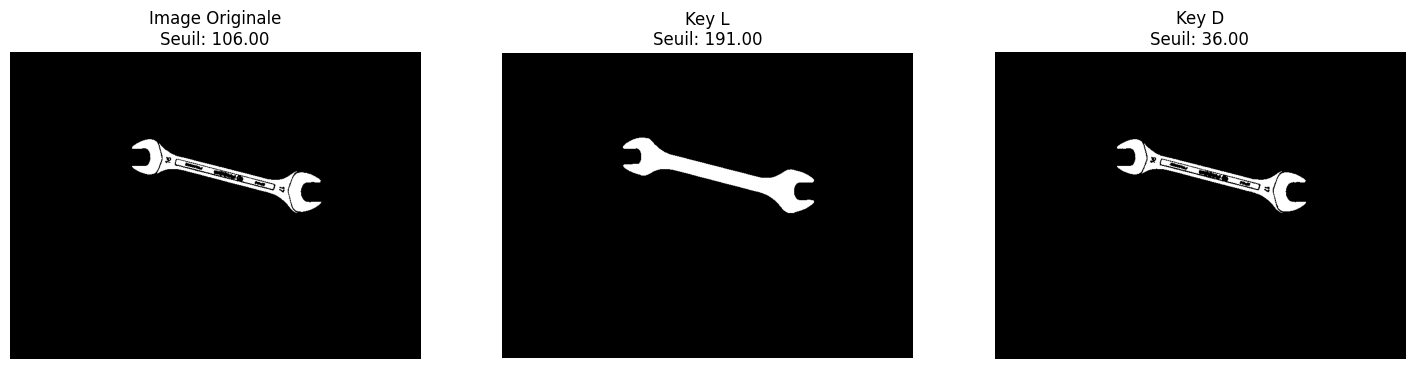

Minimum Threshold - Image: 106.00
Minimum Threshold - Key L: 191.00
Minimum Threshold - Key D: 36.00


In [253]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_minimum

def minimum_threshold(image):
    # Calcul du seuil avec la méthode Minimum
    thresh = threshold_minimum(image)
    # Application du seuil
    binary_image = np.where(image > thresh, 255, 0).astype(np.uint8)
    return thresh, binary_image

# Appliquer la méthode Minimum aux trois images
thresh_min, image_min = minimum_threshold(image)
thresh_min_l, key_l_min = minimum_threshold(key_l_img)
thresh_min_d, key_d_min = minimum_threshold(key_d_img)

# Afficher les résultats
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

axes[0].imshow(image_min, cmap="gray")
axes[0].set_title(f"Image Originale\nSeuil: {thresh_min:.2f}")
axes[0].axis('off')

axes[1].imshow(key_l_min, cmap="gray")
axes[1].set_title(f"Key L\nSeuil: {thresh_min_l:.2f}")
axes[1].axis('off')

axes[2].imshow(key_d_min, cmap="gray")
axes[2].set_title(f"Key D\nSeuil: {thresh_min_d:.2f}")
axes[2].axis('off')

plt.show()

# Afficher les seuils
print(f"Minimum Threshold - Image: {thresh_min:.2f}")
print(f"Minimum Threshold - Key L: {thresh_min_l:.2f}")
print(f"Minimum Threshold - Key D: {thresh_min_d:.2f}")

##Comparaison entre seuil manuel et seuil automatique
Les résultats obtenus dans les méthodes automatiques sont proches entre eux. Ici, dans la comparaison, nous parlerons d’Otsu, mais cela s’applique également aux autres méthodes.

Dans nos résultats, les seuils manuels et automatiques, comme ceux obtenus par Otsu, sont relativement proches dans le cas de key_d, ce qui montre que la méthode manuelle était déjà proche de l’optimum pour cette image. Cependant, dans le cas de l’image key_l, les seuils d’Otsu sont plus élevés que ceux choisis manuellement.

Conclusion : Les méthodes automatiques, telles qu'Otsu, qui reposent sur une approche statistique, fournissent un seuil plus précis, notamment lorsque l’intensité de l’image présente des variations plus complexes.


In [255]:
###otsu adaptative

### 1.2 Pré-traitement avant contrôle dimensionnel

**1. Délimitation de la zone d’intérêt (ROI)**

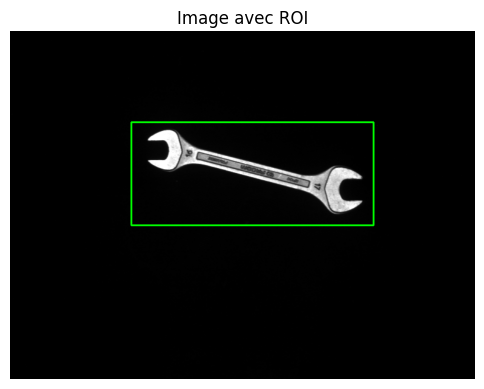

In [256]:
"""### 1. Délimitation de la zone d’intérêt (ROI)
• Sachant que la clé est toujours positionnée approximativement au même endroit dans l’image, définissez une région d’intérêt (ROI) pertinente pour limiter l’analyse aux zones utiles et réduire le bruit.
• Justifiez votre choix.
"""


roi_x_min, roi_y_min = 200, 150  # Haut gauche
roi_x_max, roi_y_max = 600, 320  # Bas droite
roi = image[roi_y_min:roi_y_max, roi_x_min:roi_x_max]

# Mettre en évidence la ROI avec un rectangle
highlighted_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.rectangle(highlighted_image, (roi_x_min, roi_y_min), (roi_x_max, roi_y_max), (0, 255, 0), 2)  # Rectangle vert

# Afficher l'image avec la ROI
plt.figure(figsize=(6, 6))
plt.imshow(highlighted_image)
plt.title("Image avec ROI")
plt.axis('off')
plt.show()



### **Définition de la ROI et justification**  


- **Définition de la ROI :** La ROI est définie par un rectangle allant de (200, 150) à (600, 320) pour englober la clé.
  
- **Justification :**  
  - La clé étant approximativement au même endroit, cette ROI cible sa position et inclut toute sa surface.  
  - Elle réduit le bruit en excluant le fond noir majoritaire.  
  - Elle se concentre sur les pixels pertinents, optimisant l’analyse.


**Choix d'une méthode de seuillage automatique**

**Méthode choisie :**

J’ai sélectionné la méthode d’Otsu pour séparer la clé du fond dans les images Key_, car elle est efficace face aux variations d’éclairage et de contraste.

**Explication du choix :**

Otsu fonctionne bien avec les changements observés en 1.1. Les histogrammes ont parfois un fond vers 0 et une clé entre 60 et 170, mais parfois le fond augmente ou la clé diminue (comme dans les images key_L et key_D). Otsu s’adapte en trouvant un seuil qui sépare clairement les deux, sans supposer où sont les pics.

Dans notre cas, même la méthode du minimum et la méthode itérative donnent de bons résultats, mais dans d'autres cas, elles peuvent présenter des limites. En effet, une méthode d’Otsu est plus fiable que la méthode du minimum, qui peut se tromper avec du bruit, ou que l’itérative, qui risque de donner un seuil incorrect si le fond et la clé s’inversent ou si une zone domine trop, car elle repose sur des moyennes qui peuvent être déséquilibrées. Cependant, si le fond et la clé ont des intensités très proches (tous deux clairs ou sombres), Otsu peut avoir du mal à les distinguer. Otsu fonctionne également bien si l’objet est plus petit que le fond, car il se base sur les différences d’intensité et non sur la taille.

Les méthodes de seuillage adaptatives peuvent donner de meilleurs résultats, mais elles nécessitent un réglage de la fenêtre pour chaque image. Otsu reste une méthode simple et efficace pour la plupart des images

## Appliquez cette méthode à l'image Key 16 17 et observez les résultats sur la ROI définie auparavant

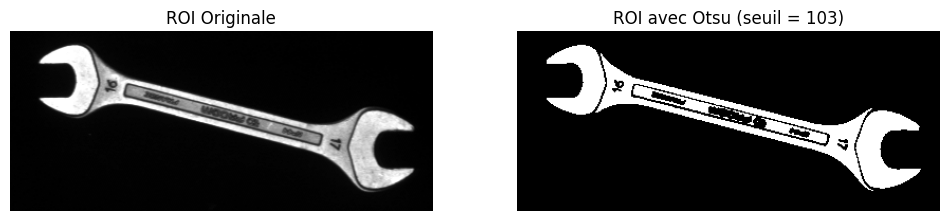

Seuil Otsu pour la ROI : 103


In [257]:
roi = image[roi_y_min:roi_y_max, roi_x_min:roi_x_max]

# Appliquer Otsu sur la ROI
best_threshold, roi_otsu = otsu_threshold(roi)

# Afficher les résultats
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(roi, cmap='gray')
axes[0].set_title("ROI Originale")
axes[0].axis('off')
axes[1].imshow(roi_otsu, cmap='gray')
axes[1].set_title(f"ROI avec Otsu (seuil = {best_threshold})")
axes[1].axis('off')
plt.show()

# Afficher le seuil trouvé
print(f"Seuil Otsu pour la ROI : {best_threshold}")

Le seuil obtenu est 103, proche du 101 trouvé avant. Le fond et la clé sont bien séparés, mais on perd quelques pixels sur les bords de la clé, probablement à cause de transitions floues entre le fond et l’objet.

**Analyse de la robustesse**

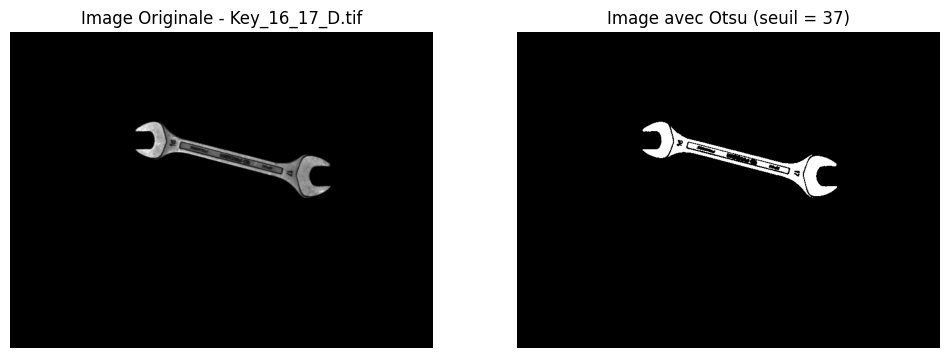

Seuil Otsu pour Key_16_17_D.tif : 37


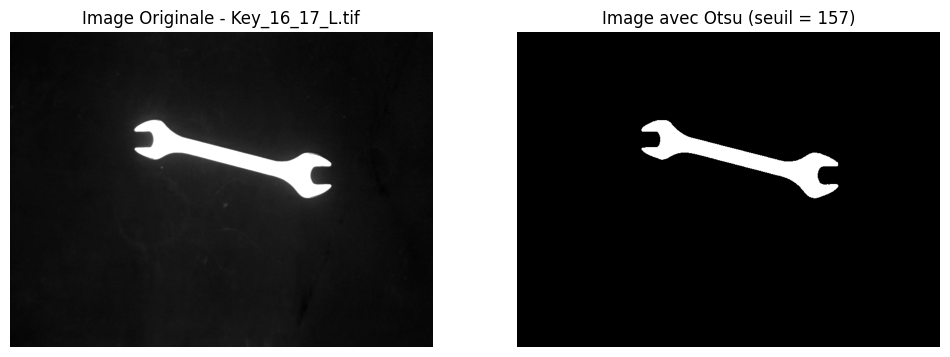

Seuil Otsu pour Key_16_17_L.tif : 157


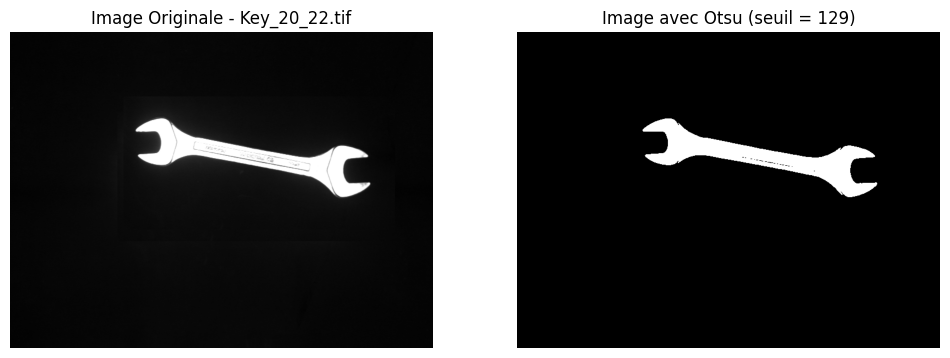

Seuil Otsu pour Key_20_22.tif : 129


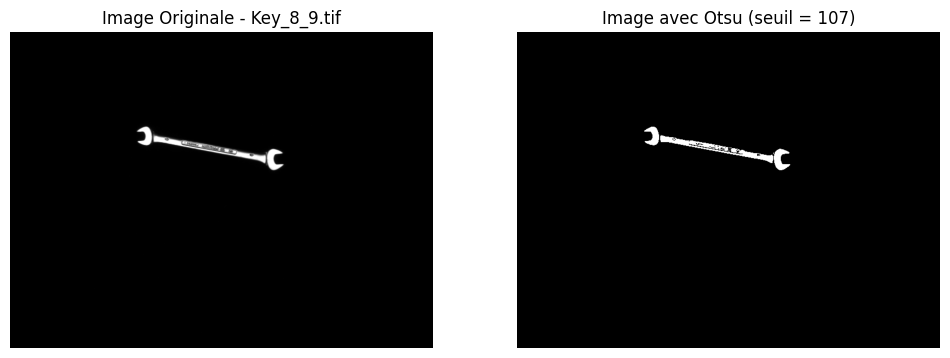

Seuil Otsu pour Key_8_9.tif : 107


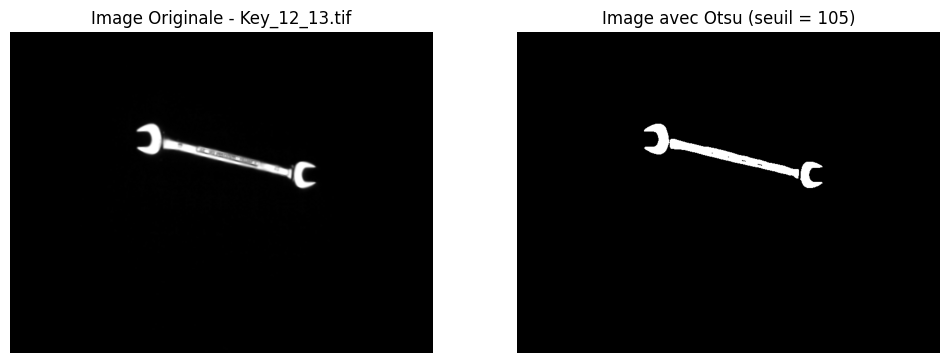

Seuil Otsu pour Key_12_13.tif : 105


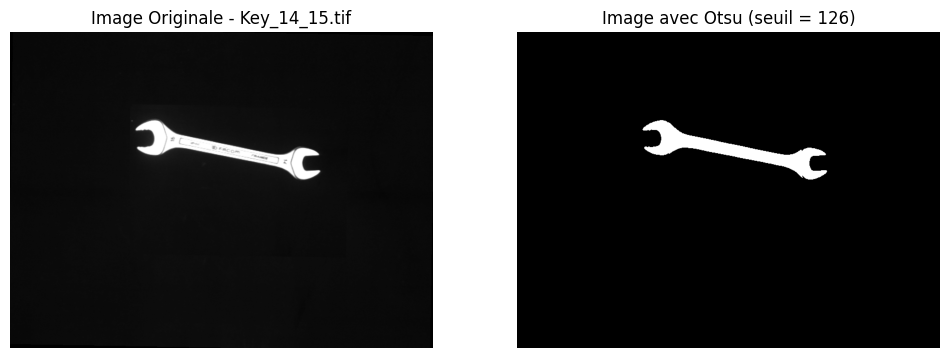

Seuil Otsu pour Key_14_15.tif : 126


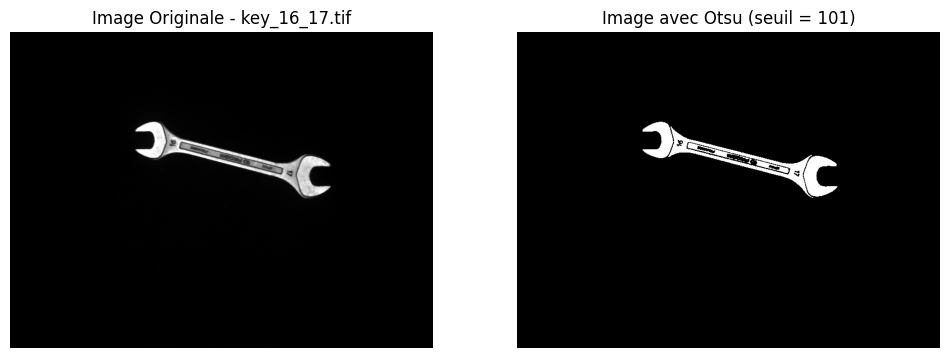

Seuil Otsu pour key_16_17.tif : 101


In [258]:
from skimage import io

image_names = [
    "Key_16_17_D.tif",
    "Key_16_17_L.tif",
    "Key_20_22.tif",
    "Key_8_9.tif",
    "Key_12_13.tif",
    "Key_14_15.tif",
    "key_16_17.tif"
]

# Boucle sur chaque image pour appliquer Otsu
for image_name in image_names:
    # Charger l'image (le fichier est directement dans le répertoire courant)
    image = io.imread(image_name)

    # Appliquer Otsu sur l'image entière
    best_threshold, image_otsu = otsu_threshold(image)

    # Afficher les résultats
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title(f"Image Originale - {image_name}")
    axes[0].axis('off')
    axes[1].imshow(image_otsu, cmap='gray')
    axes[1].set_title(f"Image avec Otsu (seuil = {best_threshold})")
    axes[1].axis('off')
    plt.show()

    # Afficher le seuil trouvé
    print(f"Seuil Otsu pour {image_name} : {best_threshold}")


La méthode de seuillage d’Otsu a été appliquée sur les images suivantes de la série Key_16_17_*.tif :
Key_16_17.tif (seuils Otsu 157 et 101), Key_20_22.tif (seuil Otsu 129), Key_8_9.tif (seuil Otsu 107), Key_12_13.tif (seuil Otsu 105), et Key_14_15.tif (seuil Otsu 126). Ces images ont été comparées à des seuils manuels fournis : 40 (général), 35 (seuil_img_d), et 120 (seuil_img_l).
La méthode d’Otsu calcule automatiquement un seuil en fonction de l’histogramme de l’image, et les seuils obtenus varient de 101 à 157. Ces valeurs sont systématiquement plus élevées que les seuils manuels des images originales (40, 35, 120), ce qui indique que les images ont un faible contraste ou une distribution d’intensité concentrée vers les basses valeurs (fond sombre). Par exemple, dans Key_16_17.tif, le seuil Otsu de 101 est bien supérieur au seuil manuel de 40, ce qui a conduit à une sur-segmentation (la clé est trop épaisse). Dans Key_8_9.tif, le seuil Otsu de 107 est également supérieur au seuil manuel de 40, entraînant une sous-segmentation (la clé est trop fine).
La méthode d’Otsu s’adapte aux variations des conditions d’acquisition (éclairage, contraste), mais cette adaptation n’est pas toujours optimale. Les seuils manuels suggèrent que des valeurs plus basses (40, 35) sont nécessaires pour une segmentation correcte dans la plupart des cas, tandis qu’un seuil de 120 (seuil_img_l) pourrait convenir à une image plus lumineuse. La large plage de seuils calculés par Otsu (101 à 157) montre une sensibilité aux variations de contraste, ce qui peut entraîner des erreurs de segmentation.
L’application de la méthode d’Otsu sur les images de la série Key_16_17_*.tif a révélé plusieurs problèmes :

Perte d’information et sous-segmentation :
Dans Key_8_9.tif (seuil Otsu 107) et Key_12_13.tif (seuil Otsu 105), la clé à molette est trop fine, indiquant une perte de pixels de bordure due à un seuil trop élevé par rapport aux seuils manuels (40, 35). Dans Key_14_15.tif (seuil Otsu 126), la segmentation est correcte, mais le seuil est légèrement supérieur au seuil manuel de 120 (seuil_img_l), ce qui peut entraîner une légère perte de détails.
Dans Key_16_17.tif (seuil Otsu 101), la clé est trop épaisse, car le seuil est bien supérieur au seuil manuel de 40 ou 35, incluant des pixels d’arrière-plan dans l’avant-plan.
Bien que les images soient propres, la méthode d’Otsu est sensible au bruit. Un seuil manuel bas (40, 35) pourrait inclure des artefacts, tandis que les seuils élevés d’Otsu (comme 157) réduisent cette sensibilité, mais au détriment des détails.

Ajustements proposés

Pour remédier à ces problèmes, les ajustements suivants sont proposés :
Utilisation des seuils manuels :
Les seuils manuels (40, 35, 120) sont plus adaptés que les seuils d’Otsu. Par exemple, un seuil de 40 pour Key_16_17.tif éviterait la sur-segmentation, et un seuil de 40 pour Key_8_9.tif préserverait plus de détails.
Pré-traitement :
Appliquer une égalisation d’histogramme ou un étirement de contraste pour rendre l’histogramme plus bimodal, permettant à Otsu de calculer un seuil plus proche des valeurs manuelles. Cela réduirait la sous-segmentation dans Key_8_9.tif.
Réduction du bruit :
Si du bruit est présent, utiliser un flou gaussien ou un filtre médian avant le seuillage, surtout avec un seuil bas (40, 35).
Seuillage adaptatif :
Utiliser un seuillage adaptatif (par exemple, Otsu local) pour gérer les variations d’éclairage, utile pour des images avec des seuils manuels variés (35 à 120).
Post-traitement :
Opérations morphologiques :
Appliquer une dilatation pour la sous-segmentation (par exemple, Key_8_9.tif) et une érosion pour la sur-segmentation (par exemple, Key_16_17.tif).
Filtrage des artefacts :
Supprimer les petites composantes blanches pour éliminer les artefacts.
Ajustement du seuil d’Otsu :
Ajouter un décalage négatif au seuil d’Otsu pour se rapprocher des seuils manuels (par exemple, réduire le seuil de 101 à environ 40 pour Key_16_17.tif).

## Application au problème de contrôle dimensionnel

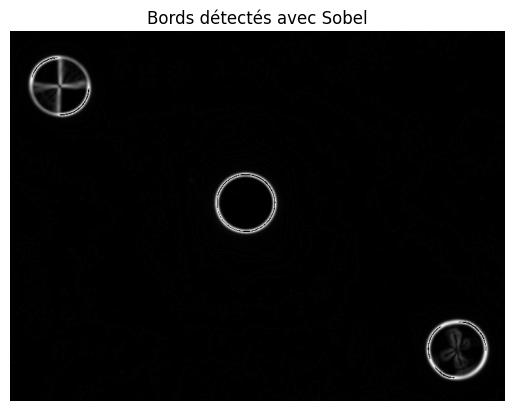

Nombre de cercles détectés : 3
Diamètre moyen détecté : 90.67 pixels
Résolution (mm/pixel) : 0.4963


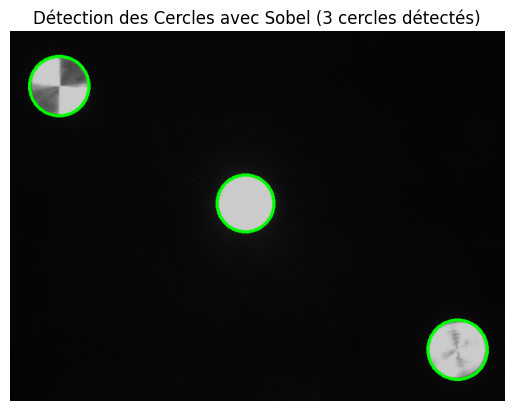

In [260]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveaux de gris
image_path = './Etalon_45.tif'
etalon = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Appliquer un flou gaussien pour réduire le bruit
image_blurred = cv2.GaussianBlur(etalon, (9, 9), 2)

# Appliquer l'opérateur Sobel pour détecter les bords
sobel_x = cv2.Sobel(image_blurred, cv2.CV_64F, 1, 0, ksize=3)  # Gradient en X
sobel_y = cv2.Sobel(image_blurred, cv2.CV_64F, 0, 1, ksize=3)  # Gradient en Y

# Calculer la magnitude du gradient
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Convertir en image 8 bits (nécessaire pour HoughCircles)
sobel_magnitude = np.uint8(np.absolute(sobel_magnitude))

# Afficher l'image des bords après Sobel
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Bords détectés avec Sobel')
plt.axis('off')
plt.show()

# Détecter les cercles avec HoughCircles sur l'image des gradients
circles = cv2.HoughCircles(sobel_magnitude, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                           param1=100, param2=30, minRadius=10, maxRadius=50)

# Vérifier si des cercles sont détectés
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    # Afficher le nombre de cercles détectés
    print(f"Nombre de cercles détectés : {len(circles)}")

    # Calculer les diamètres
    diameters = [2 * r for (x, y, r) in circles]
    mean_diameter_pixels = np.mean(diameters)

    # Résolution en mm/pixel
    diameter_real_mm = 45  # Diamètre réel du cercle (en mm)
    resolution = diameter_real_mm / mean_diameter_pixels

    # Afficher les résultats
    print(f"Diamètre moyen détecté : {mean_diameter_pixels:.2f} pixels")
    print(f"Résolution (mm/pixel) : {resolution:.4f}")

    # Afficher l'image avec les cercles détectés
    output_image = cv2.cvtColor(etalon, cv2.COLOR_GRAY2BGR)
    for (x, y, r) in circles:
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 4)

    plt.imshow(output_image)
    plt.title(f'Détection des Cercles avec Sobel ({len(circles)} cercles détectés)')
    plt.axis('off')
    plt.show()
else:
    print("Aucun cercle détecté.")


1. **Démarche :**
J'ai utilisé l'opérateur Sobel pour détecter les bords de l'image, ce qui permet de mieux localiser les contours des cercles. Ensuite, j'ai appliqué la méthode de détection Hough pour repérer ces cercles et calculer leur diamètre moyen. Enfin, j'ai calculé la résolution en mm/pixel en comparant le diamètre réel de la pièce avec celui détecté en pixels.
esolution : 0.4963

2. **Avantage de la pièce circulaire pour l'étalonnage :**
Une pièce circulaire est idéale car sa forme régulière permet une détection plus précise des bords et des diamètres, ce qui facilite le calcul de la résolution de manière fiable.

3. **Pourquoi plusieurs positions ?**
Positionner la pièce à plusieurs endroits permet de compenser les erreurs de perspective et de garantir une mesure plus représentative de l'ensemble de l'image. Cela aide à éviter des résultats biaisés dus à une seule vue de la pièce.

4. **Choisir une pièce de faible épaisseur :**
Une pièce de faible épaisseur est préférable car elle réduit les effets de distorsion qui peuvent se produire avec des objets plus épais. Cela garantit des mesures plus précises et moins sujettes à des erreurs liées à la profondeur de champ.

### 2. Choix d'une méthode de contrôle automatique


Le programme commence par charger une liste d’images en niveaux de gris à l’aide de `cv2.imread`. Une fois les images chargées, un flou gaussien est appliqué pour réduire le bruit et lisser les images avant la détection des contours, ce qui permet d’éviter les fausses détections. Ensuite, l’algorithme de Canny est utilisé pour détecter les bords les plus marqués dans chaque image.  

Après cette détection, une série d’opérations morphologiques est appliquée pour fermer les contours. Une dilatation est d’abord réalisée pour renforcer les bords, suivie d’une érosion afin d’affiner les contours fermés. Les contours sont ensuite extraits avec `cv2.findContours` et dessinés sur des images binaires où ils sont remplis en blanc.  

Le programme analyse ensuite chaque colonne des images traitées afin d’identifier les transitions entre noir (0) et blanc (255). Une colonne est sélectionnée uniquement si elle contient exactement quatre transitions et si la deuxième transition est du blanc vers le noir. Pour ces colonnes retenues dans **toutes les images**, la distance verticale entre la deuxième et la troisième transition est calculée et stockée dans une structure de données globale.  

Parmi toutes les colonnes analysées sur **l’ensemble des images**, celle qui présente la plus grande distance entre ces deux transitions **au niveau des clés de serrage** est identifiée. Ses informations sont affichées dans la console, ainsi que l’image correspondante. Pour faciliter la visualisation, les points de transition de cette colonne sont marqués par des cercles bleus sur l’image, qui est ensuite affichée à l’aide de `matplotlib`.  

### **Résultats**  
Grâce à cet algorithme, la ligne des clés de serrage a pu être automatiquement détectée sur **l’ensemble des images**. Dans la majorité des cas, cette ligne se situe à l’extrémité des images (comme on peut le voir sur les résultats obtenus). Cela s’explique par le fait que l’algorithme retourne la **plus grande distance mesurée sur les clés de serrage** parmi toutes les images traitées. La valeur maximale de cette distance, ainsi que la colonne correspondante et l’image où elle a été détectée, sont affichées dans la sortie du code.  

### **Limites**  
L’algorithme est actuellement conçu pour toujours retourner la **distance maximale des clés de serrage sur l’ensemble des images**, mais l’idéal serait d’extraire une valeur moyenne pour obtenir une représentation plus fiable. Cependant, cette approche est difficile à mettre en œuvre en raison du bruit présent dans les images. Une amélioration potentielle serait d’intégrer un filtrage plus avancé ou une méthode de pondération des distances pour obtenir un résultat plus représentatif de toutes les images analysées.  


##Code


Processing: Key_16_17_L.tif
Max distance column: 582
Distance: 34
Transition positions: [237, 243, 277, 283]


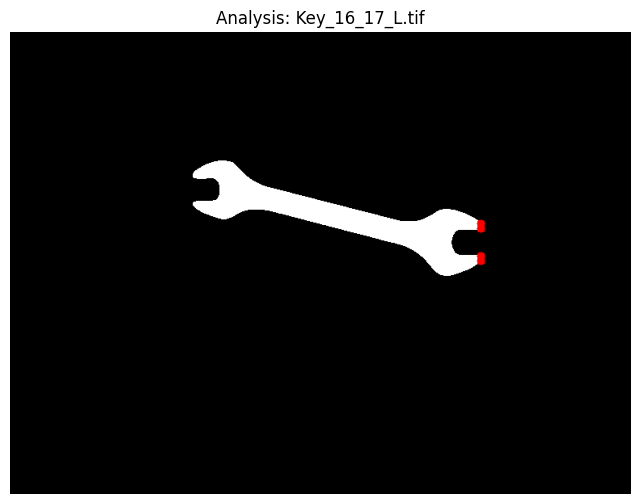


Processing: Key_20_22.tif
Max distance column: 637
Distance: 46
Transition positions: [215, 228, 274, 290]


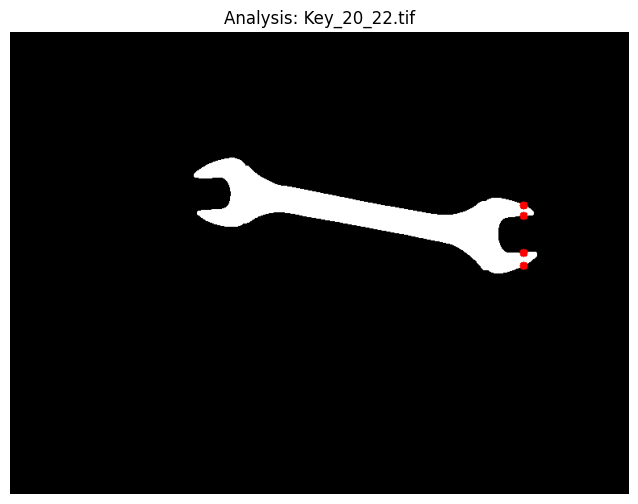


Processing: Key_8_9.tif
Max distance column: 494
Distance: 19
Transition positions: [220, 221, 240, 244]


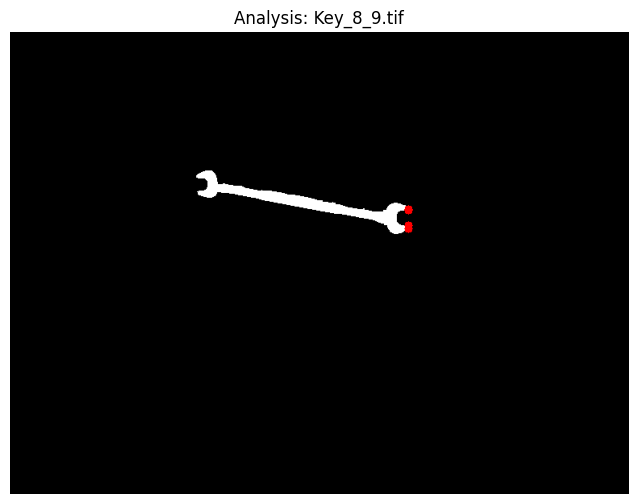


Processing: Key_12_13.tif
Max distance column: 227
Distance: 28
Transition positions: [174, 178, 206, 210]


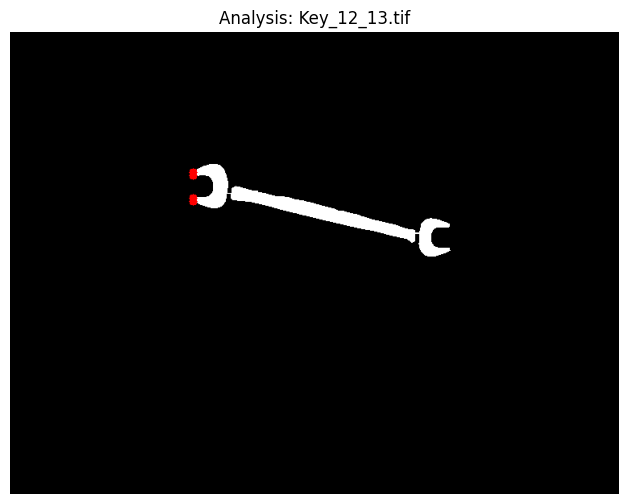


Processing: Key_14_15.tif
Max distance column: 230
Distance: 30
Transition positions: [173, 179, 209, 213]


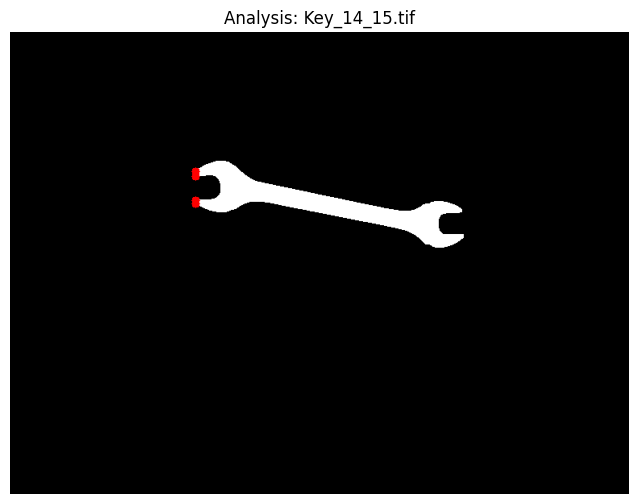


Processing: key_16_17.tif
Max distance column: 580
Distance: 37
Transition positions: [239, 243, 280, 284]


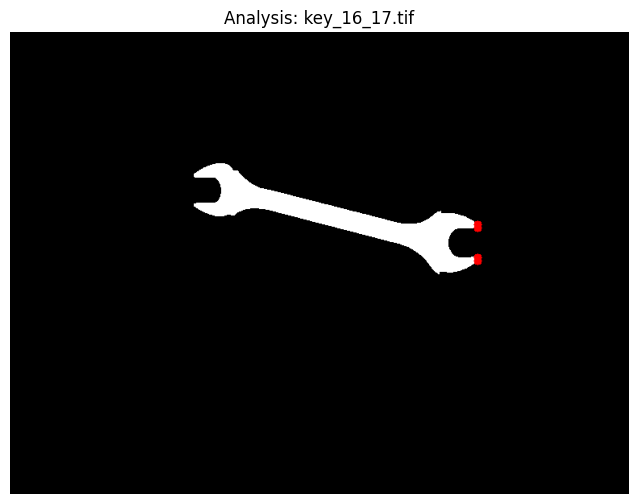


Processing: Key_16_17_D.tif
Max distance column: 579
Distance: 37
Transition positions: [238, 243, 280, 285]


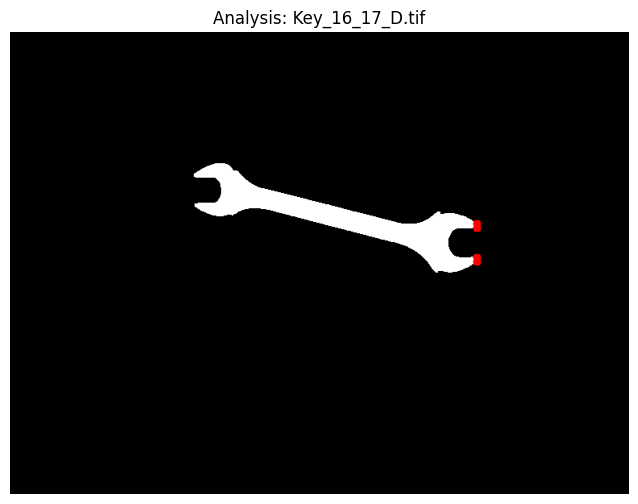

In [273]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_files = [
    "Key_16_17_L.tif",
    "Key_20_22.tif",
    "Key_8_9.tif",
    "Key_12_13.tif",
    "Key_14_15.tif",
    "key_16_17.tif",
    "Key_16_17_D.tif"
]

for image_path in image_files:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Image processing pipeline
    image_blurred = cv2.GaussianBlur(image, (9, 9), 2)
    edges = cv2.Canny(image_blurred, 50, 150)
    kernel = np.ones((5, 5), np.uint8)
    closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Contour detection and filling
    contours, _ = cv2.findContours(closed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    separated_image = np.zeros_like(image)
    cv2.drawContours(separated_image, contours, -1, 255, cv2.FILLED)

    # Visualization setup
    marked_image = cv2.cvtColor(separated_image, cv2.COLOR_GRAY2BGR)
    results = {}

    # Column analysis
    for col in range(separated_image.shape[1]):
        transitions = []
        for row in range(1, separated_image.shape[0]):
            if separated_image[row, col] != separated_image[row-1, col]:
                transitions.append((row, separated_image[row, col]))

        if len(transitions) == 4 and transitions[1][1] == 0 and transitions[2][1] == 255:
            distance = transitions[2][0] - transitions[1][0]
            results[col] = {
                'distance': distance,
                'positions': [t[0] for t in transitions]
            }

    # Results handling
    print(f"\nProcessing: {image_path}")
    if results:
        max_col, max_data = max(results.items(), key=lambda x: x[1]['distance'])

        # Mark points on image
        for row in max_data['positions']:
            cv2.circle(marked_image, (max_col, row), 5, (255, 0, 0), -1)

        # Simplified output
        print(f"Max distance column: {max_col}")
        print(f"Distance: {max_data['distance']}")
        print(f"Transition positions: {max_data['positions']}")
    else:
        print("No valid columns found")

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.imshow(marked_image)
    plt.title(f"Analysis: {image_path}")
    plt.axis('off')
    plt.show()

Largeur 32 px donc 64 mm car d'aprés question precedente l'echelle est de 0.5

## Part 2

Image loaded successfully.
Image shape: (459, 612, 3) (height, width, channels)


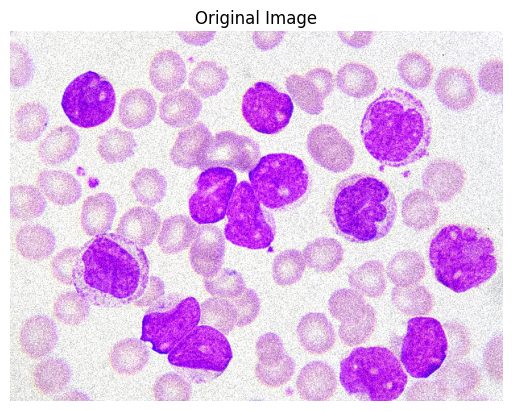

Step 1: Smoothing applied with GaussianBlur (5x5 kernel).
Step 2: HSV color masking applied to isolate purple regions (basophils).


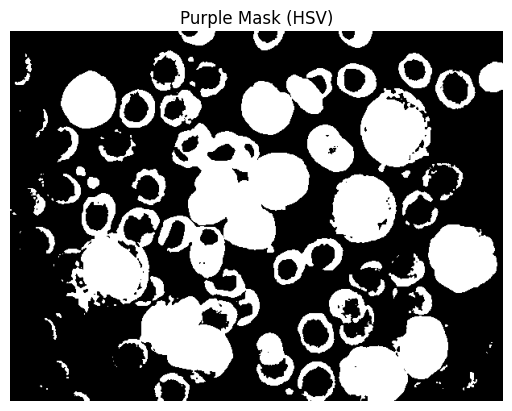

Step 3: Converted to grayscale.
Step 4: Otsu thresholding applied only on masked region. Otsu threshold value: 148.0


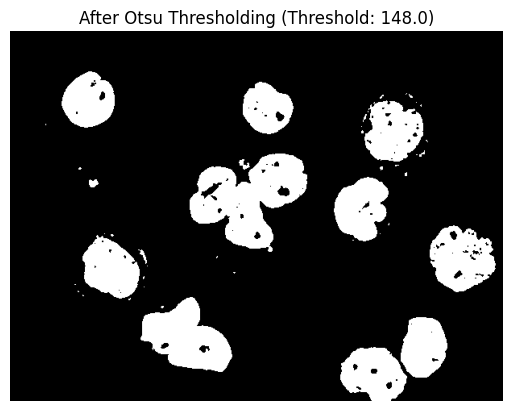

Step 5: Opening applied with kernel size (3x3) and 2 iteration(s).


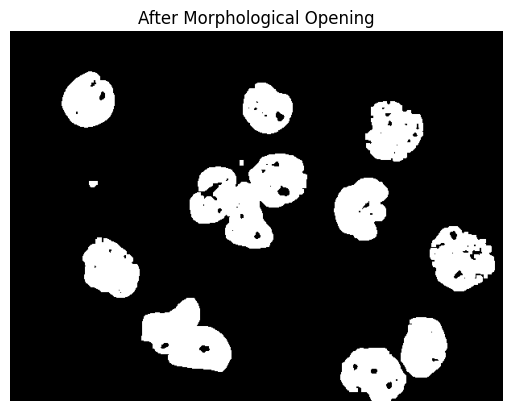

Step 6: Contour detection completed. Total contours found: 12


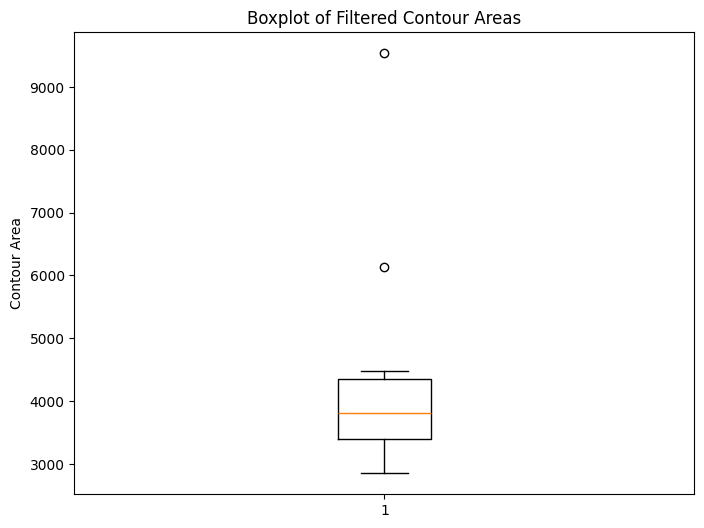

Median area: 3804.5
Q1: 3404.625, Q3: 4348.0, IQR: 943.375
Lower bound for outliers: 1989.5625, Upper bound for outliers: 5763.0625
Normal area: 3941.5, Count: 1
Normal area: 3256.5, Count: 1
Outlier area: 6133.0, Adjusted count: 2
Normal area: 3676.5, Count: 1
Normal area: 4483.5, Count: 1
Normal area: 3740.5, Count: 1
Outlier area: 9537.0, Adjusted count: 3
Normal area: 3868.5, Count: 1
Normal area: 2852.0, Count: 1
Normal area: 3314.0, Count: 1
Final estimated cell count: 13


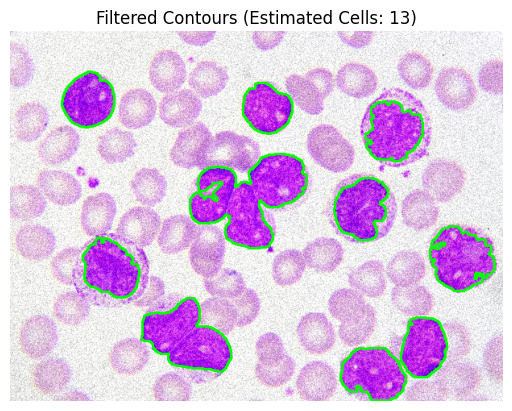

In [263]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics

# Load the image in color (BGR), not grayscale
image_path = "./imageonline-co-noisedimage.png"
blood_img_0 = cv2.imread(image_path)  # Default flag loads in BGR (color)

# Check if the image was loaded successfully
if blood_img_0 is None:
    raise ValueError("Image could not be loaded. Check the file path.")

print("Image loaded successfully.")
print(f"Image shape: {blood_img_0.shape} (height, width, channels)")

# Display the original image (convert BGR to RGB for correct color display in matplotlib)
plt.imshow(cv2.cvtColor(blood_img_0, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

# Step 1: Smoothing
img_0_blr = cv2.GaussianBlur(blood_img_0, (5, 5), 0)
print("Step 1: Smoothing applied with GaussianBlur (5x5 kernel).")

# Step 2: Convert to HSV and mask purple (optional but recommended for basophils)
hsv = cv2.cvtColor(img_0_blr, cv2.COLOR_BGR2HSV)
lower_purple = np.array([130, 50, 50])
upper_purple = np.array([160, 255, 255])
mask = cv2.inRange(hsv, lower_purple, upper_purple)
print("Step 2: HSV color masking applied to isolate purple regions (basophils).")

# Display the mask (for debugging)
plt.imshow(mask, cmap='gray')
plt.title("Purple Mask (HSV)")
plt.axis('off')
plt.show()

# Step 3: Convert to grayscale (after color-based masking)
gray = cv2.cvtColor(img_0_blr, cv2.COLOR_BGR2GRAY)
print("Step 3: Converted to grayscale.")

# Step 4: Compute Otsu's threshold only on the masked region
masked_pixels = gray[mask > 0]  # Extract pixels inside the mask
otsu_threshold, _ = cv2.threshold(masked_pixels, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Apply the threshold only to the masked region
thresh = np.zeros_like(gray)
binary_masked = (gray < otsu_threshold).astype(np.uint8) * 255
thresh[mask > 0] = binary_masked[mask > 0]
print(f"Step 4: Otsu thresholding applied only on masked region. Otsu threshold value: {otsu_threshold}")

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.title(f"After Otsu Thresholding (Threshold: {otsu_threshold})")
plt.axis('off')
plt.show()

# Step 5: Morphological operation - Opening to remove small noise
kernel = np.ones((3, 3), np.uint8)
iterations = 2  # Number of iterations for the opening operation
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=iterations)
print(f"Step 5: Opening applied with kernel size (3x3) and {iterations} iteration(s).")

# Display the image after opening
plt.imshow(opening, cmap='gray')
plt.title(f"After Morphological Opening")
plt.axis('off')
plt.show()

# Step 6: Contour detection (missing in your code, added here)
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Step 6: Contour detection completed. Total contours found: {len(contours)}")

# Step 7: Calculate the area of each contour and filter by area
area_threshold = 500
filtered_contours = []
filtered_areas = []

for contour in contours:
    area = cv2.contourArea(contour)
    if area >= area_threshold:
        filtered_contours.append(contour)
        filtered_areas.append(area)

# Step 8: Boxplot for filtered_areas
if filtered_areas:
    plt.figure(figsize=(8, 6))
    plt.boxplot(filtered_areas)
    plt.title('Boxplot of Filtered Contour Areas')
    plt.ylabel('Contour Area')
    plt.show()

    # Compute median and identify outliers using IQR
    median_area = statistics.median(filtered_areas)
    q1 = np.percentile(filtered_areas, 25)
    q3 = np.percentile(filtered_areas, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print(f"Median area: {median_area}")
    print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")
    print(f"Lower bound for outliers: {lower_bound}, Upper bound for outliers: {upper_bound}")

    # Adjust cell count with outlier logic
    total_cells = 0
    for area in filtered_areas:
        if area < lower_bound or area > upper_bound:  # Outlier
            adjusted_count = area / median_area
            total_cells += int(adjusted_count + 0.5)  # Round to nearest integer (e.g., 2.555 -> 3)
            print(f"Outlier area: {area}, Adjusted count: {int(adjusted_count + 0.5)}")
        else:  # Non-outlier
            total_cells += 1  # Increment by 1
            print(f"Normal area: {area}, Count: 1")

    print(f"Final estimated cell count: {total_cells}")
else:
    total_cells = 0
    print("No filtered contours found, cell count is 0.")

# Step 9: Visualize the filtered contours
output_image = blood_img_0.copy()
cv2.drawContours(output_image, filtered_contours, -1, (0, 255, 0), 2)

# Display the image with filtered contours
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title(f"Filtered Contours (Estimated Cells: {total_cells})")
plt.axis('off')
plt.show()

On va essayer ce code sur les autres images

Image: leucC3A9mie-cellules.png, Number of filtered contours: 13


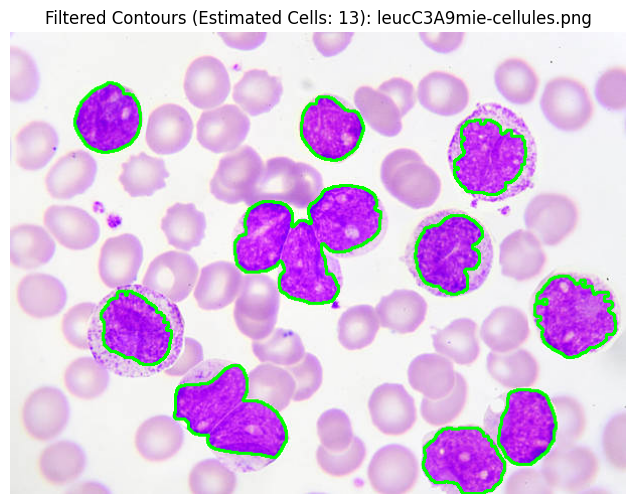

Image: imageonline-co-noisedimage.png, Number of filtered contours: 13


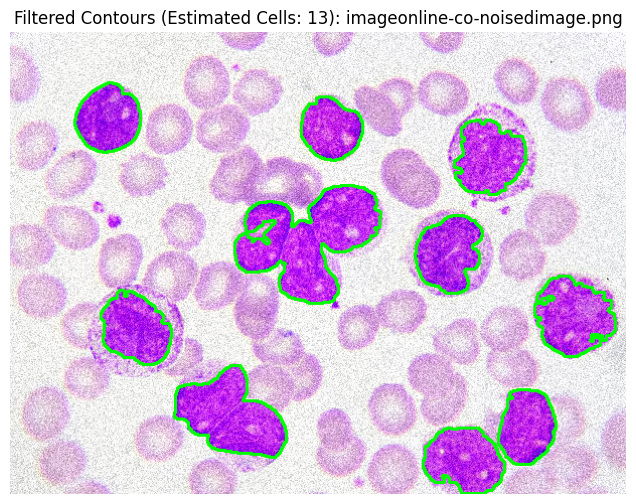

Image: imageonline-co-noisedimage1.png, Number of filtered contours: 13


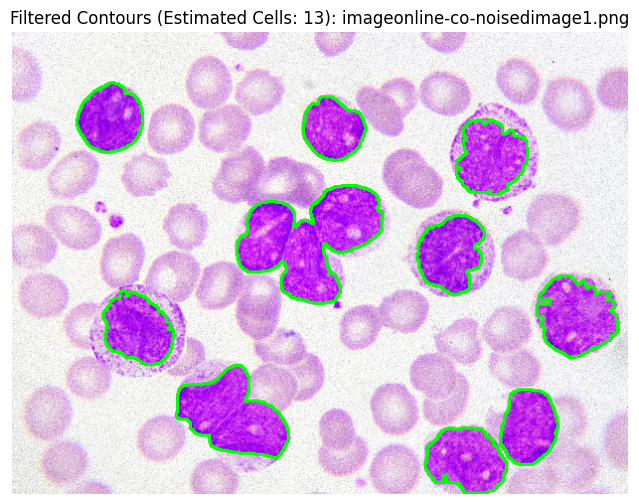

Image: imageonline-co-noisedimage2.png, Number of filtered contours: 13


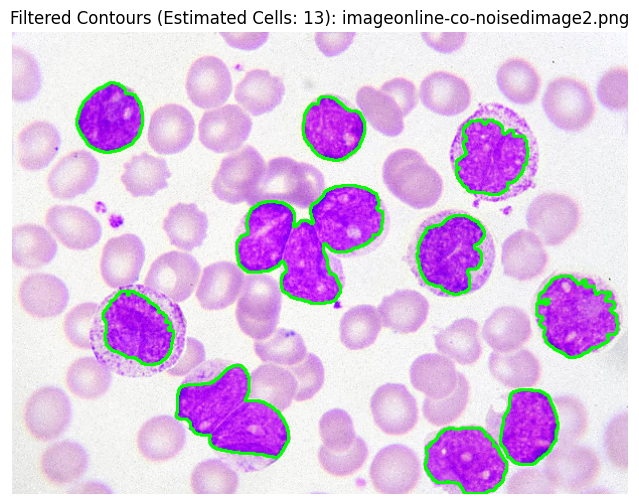

In [264]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics

image_paths = [
    "./leucC3A9mie-cellules.png",
    "./imageonline-co-noisedimage.png",
    "./imageonline-co-noisedimage1.png",
    "./imageonline-co-noisedimage2.png"
]

for image_path in image_paths:
    blood_img_0 = cv2.imread(image_path)
    if blood_img_0 is None:
        print(f"Error: Image could not be loaded from {image_path}. Skipping...")
        continue

    img_0_blr = cv2.GaussianBlur(blood_img_0, (5, 5), 0)
    hsv = cv2.cvtColor(img_0_blr, cv2.COLOR_BGR2HSV)
    lower_purple = np.array([130, 50, 50])
    upper_purple = np.array([160, 255, 255])
    mask = cv2.inRange(hsv, lower_purple, upper_purple)
    gray = cv2.cvtColor(img_0_blr, cv2.COLOR_BGR2GRAY)

    masked_pixels = gray[mask > 0]
    if len(masked_pixels) == 0:
        otsu_threshold = 0
        thresh = np.zeros_like(gray)
    else:
        otsu_threshold, _ = cv2.threshold(masked_pixels, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        thresh = np.zeros_like(gray)
        binary_masked = (gray < otsu_threshold).astype(np.uint8) * 255
        thresh[mask > 0] = binary_masked[mask > 0]

    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    area_threshold = 500
    filtered_contours = []
    filtered_areas = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area >= area_threshold:
            filtered_contours.append(contour)
            filtered_areas.append(area)

    if filtered_areas:
        median_area = statistics.median(filtered_areas)
        q1 = np.percentile(filtered_areas, 25)
        q3 = np.percentile(filtered_areas, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        total_cells = 0
        for area in filtered_areas:
            if area < lower_bound or area > upper_bound:
                adjusted_count = area / median_area
                total_cells += int(adjusted_count + 0.5)
            else:
                total_cells += 1
    else:
        total_cells = 0

    print(f"Image: {image_path.split('/')[-1]}, Number of filtered contours: {total_cells}")

    output_image = blood_img_0.copy()
    cv2.drawContours(output_image, filtered_contours, -1, (0, 255, 0), 2)
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Filtered Contours (Estimated Cells: {total_cells}): {image_path.split('/')[-1]}")
    plt.axis('off')
    plt.show()